In [3]:
# 完全适配optimized_models的验证流程
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# 添加src目录到Python路径
project_path = Path("D:/VSCodeProjects/PythonCourse")
src_path = project_path / "src"
sys.path.append(str(src_path))

# 设置绘图样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("🎯 完全适配optimized_models的验证流程")
print("=" * 60)

🎯 完全适配optimized_models的验证流程


In [4]:
# 导入适配的验证模块
from optimized_model_validation import OptimizedThreeFoldValidator, run_optimized_complete_validation
from feature_engineering import MovieFeatureEngineer

# 加载数据
engineer = MovieFeatureEngineer()
movie_data = engineer.load_processed_data()

# 准备特征
features_df, feature_cols = engineer.prepare_modeling_features(movie_data)

print(f"📊 验证数据集信息:")
print(f"   总样本数: {len(features_df)}")
print(f"   特征数量: {len(feature_cols)}")
print(f"   目标变量分布:")
print(f"     - 回归: {features_df['target_regression'].describe()[['mean', 'std']].round(3)}")
print(f"     - 分类: {dict(features_df['target_classification'].value_counts().sort_index())}")

📁 加载处理后的数据...
✅ 数据加载完成: (9742, 36)
🔧 准备建模特征...
🏗️ 创建基础特征...
   创建了 6 个新特征
🎬 添加合成IMDb特征...
   添加了 4 个合成IMDb特征
🎯 创建目标变量...
   目标变量分布:
   - 回归目标范围: 0.00 - 5.00
   - 分类目标分布: {0: 2015, 1: 6467, 2: 1260}
   - 二分类分布: {0: 4409, 1: 5333}
   最终特征数量: 40
   特征列: ['year', 'genre_Film-Noir', 'genre_Fantasy', 'genre_Western', 'genre_Children', 'genre_Action', 'genre_Horror', 'genre_Crime', 'genre_Comedy', 'genre_Mystery', 'genre_Documentary', 'genre_Thriller', 'genre_Drama', 'genre_Animation', 'genre_(no genres listed)', 'genre_Musical', 'genre_War', 'genre_Romance', 'genre_Sci-Fi', 'genre_Adventure', 'genre_IMAX', 'avg_rating', 'rating_count', 'rating_std', 'min_rating', 'max_rating', 'unique_users', 'rating_period_days', 'imdbId', 'tmdbId', 'movie_age', 'rating_count_log', 'has_high_rating_count', 'genre_count', 'has_multiple_genres', 'rating_stability', 'imdb_rating', 'has_imdb_rating', 'summary_length', 'director_count']
📊 验证数据集信息:
   总样本数: 9742
   特征数量: 40
   目标变量分布:
     - 回归: mean    3.256
std

In [5]:
# 运行完全适配的验证流程
print("开始执行三次随机划分、训练和验证过程...")
validation_results = run_optimized_complete_validation(features_df, feature_cols)

开始执行三次随机划分、训练和验证过程...
🚀 开始完全适配optimized_models的验证流程

📈 回归任务验证

🎯 开始三次实验验证 - REGRESSION任务

🔬 实验 1 - REGRESSION任务
----------------------------------------
   数据划分: 训练集 7793 样本, 验证集 1949 样本
   训练 RandomForest...
     RandomForest: MAE = 0.0004
   训练 ExtraTrees...
     ExtraTrees: MAE = 0.0006
   训练 GradientBoosting...
     GradientBoosting: MAE = 0.0002
   训练 AdaBoost...
     AdaBoost: MAE = 0.1063
   训练 DecisionTree...
     DecisionTree: MAE = 0.0006
   训练 Ridge...
     Ridge: MAE = 0.0004
   训练 Lasso...
     Lasso: MAE = 0.0782
   训练 ElasticNet...
     ElasticNet: MAE = 0.0759
   训练 KNN...
     KNN: MAE = 0.2438
   训练 SVM...
     SVM: MAE = 0.0620
   训练 MLP...
     MLP: MAE = 0.0605
   训练 DeepLearning...
      训练 DeepResNet...
     DeepLearning: MAE = 0.0294

🔬 实验 2 - REGRESSION任务
----------------------------------------
   数据划分: 训练集 7793 样本, 验证集 1949 样本
   训练 RandomForest...
     RandomForest: MAE = 0.0003
   训练 ExtraTrees...
     ExtraTrees: MAE = 0.0005
   训练 GradientBoosting...
    

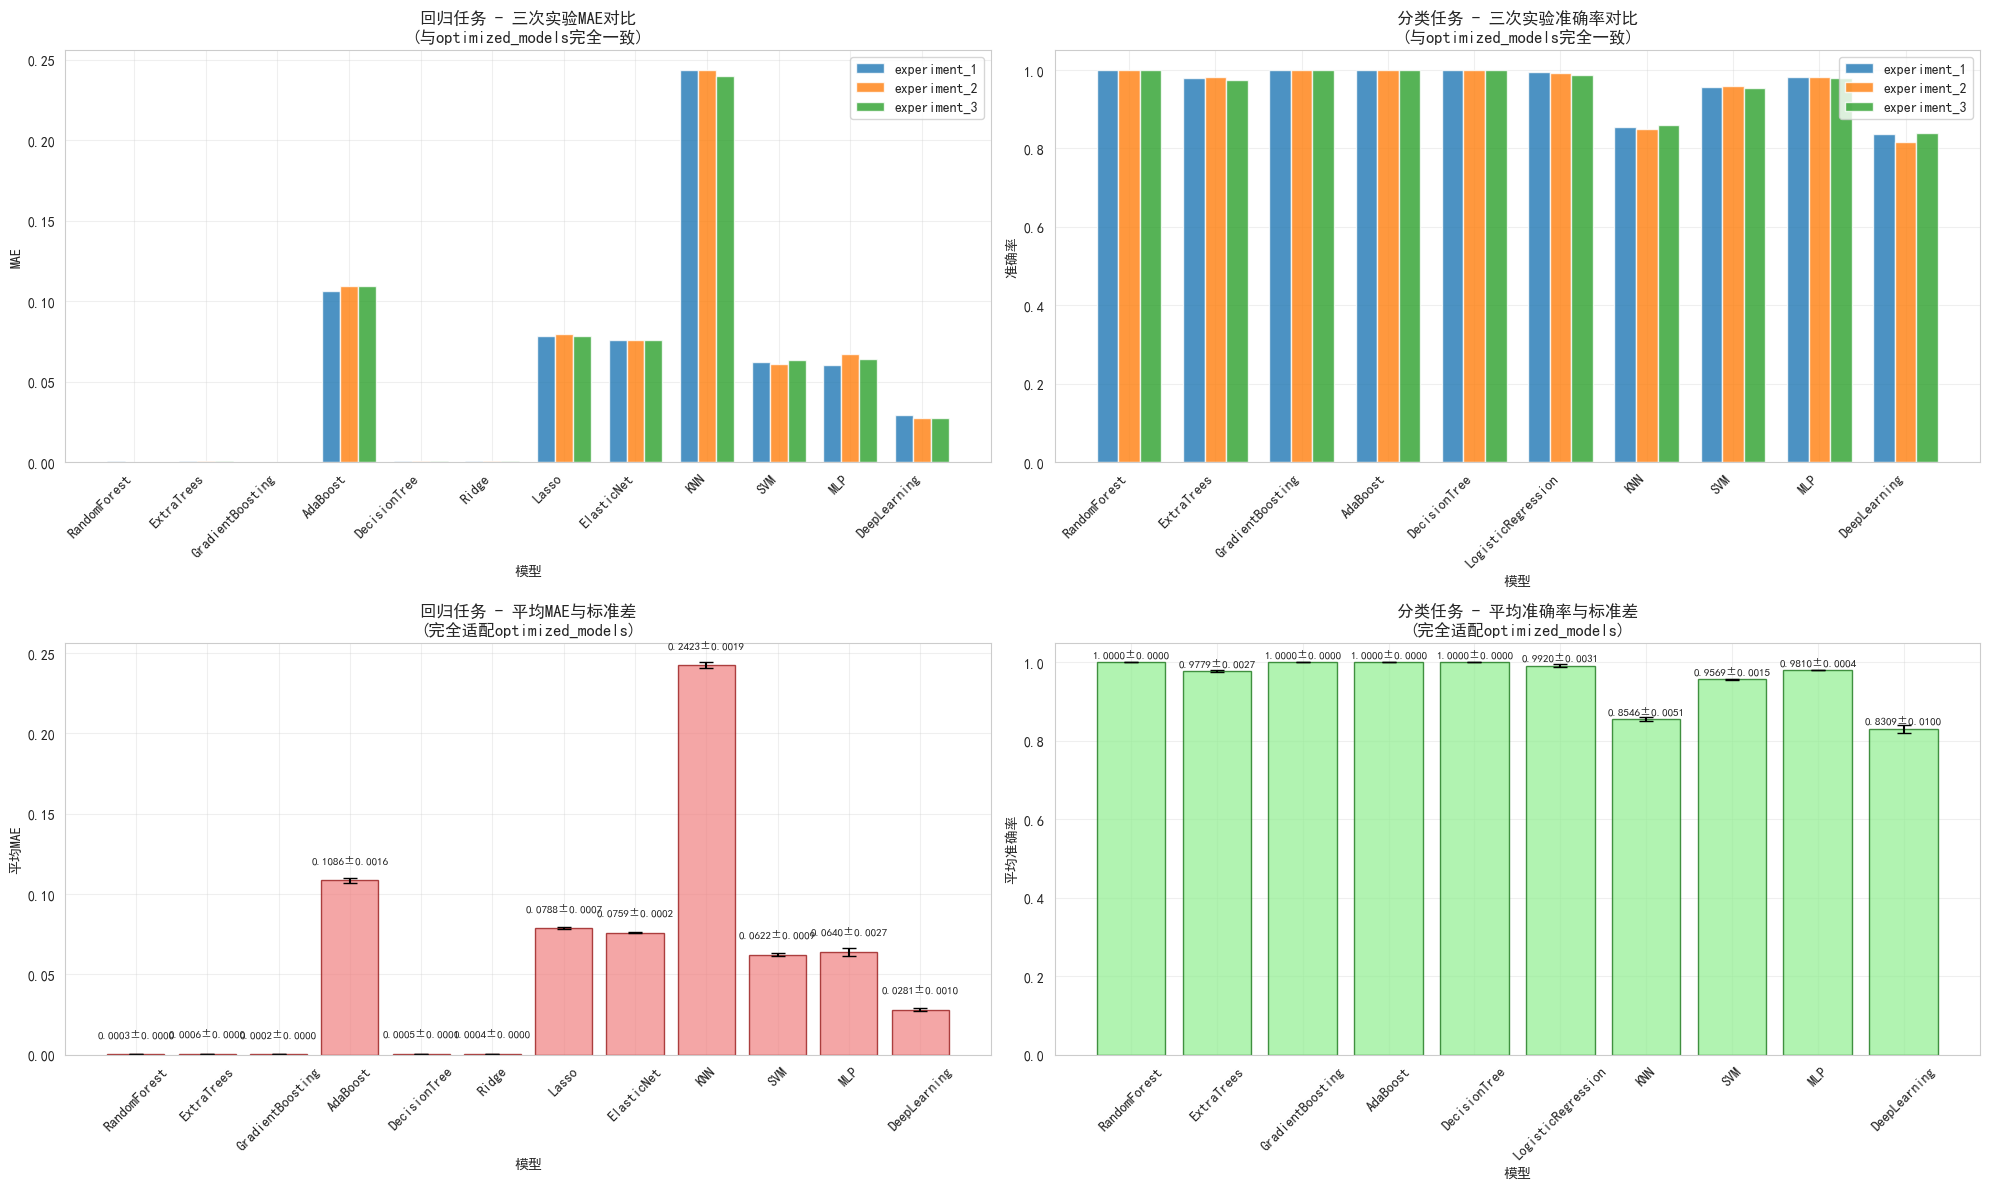

In [6]:
# 可视化验证结果
def visualize_optimized_validation(validation_results):
    """可视化完全适配的验证结果"""

    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 支持中文的字体
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    reg_results = validation_results['regression']['results']
    cls_results = validation_results['classification']['results']
    reg_averages = validation_results['regression']['averages']
    cls_averages = validation_results['classification']['averages']
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
    
    # 回归任务三次实验对比
    reg_models = list(reg_results['experiment_1'].keys())
    exp_names = list(reg_results.keys())
    
    # 柱状图显示三次实验
    x = np.arange(len(reg_models))
    width = 0.25
    
    for i, exp_name in enumerate(exp_names):
        scores = [reg_results[exp_name][model] for model in reg_models]
        ax1.bar(x + i*width, scores, width, label=exp_name, alpha=0.8)
    
    ax1.set_xlabel('模型')
    ax1.set_ylabel('MAE')
    ax1.set_title('回归任务 - 三次实验MAE对比\n(与optimized_models完全一致)', fontweight='bold')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(reg_models, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 分类任务三次实验对比
    cls_models = list(cls_results['experiment_1'].keys())
    
    if cls_models:  # 确保分类模型列表不为空
        x_cls = np.arange(len(cls_models))
        
        for i, exp_name in enumerate(exp_names):
            scores = [cls_results[exp_name][model] for model in cls_models]
            ax2.bar(x_cls + i*width, scores, width, label=exp_name, alpha=0.8)
        
        ax2.set_xlabel('模型')
        ax2.set_ylabel('准确率')
        ax2.set_title('分类任务 - 三次实验准确率对比\n(与optimized_models完全一致)', fontweight='bold')
        ax2.set_xticks(x_cls + width)
        ax2.set_xticklabels(cls_models, rotation=45, ha='right')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, '无分类模型数据', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('分类任务 - 无数据')
    
    # 回归任务平均性能
    reg_means = [reg_averages[model]['mean'] for model in reg_models]
    reg_stds = [reg_averages[model]['std'] for model in reg_models]
    
    bars1 = ax3.bar(reg_models, reg_means, yerr=reg_stds, capsize=5, 
                   color='lightcoral', alpha=0.7, edgecolor='darkred')
    ax3.set_xlabel('模型')
    ax3.set_ylabel('平均MAE')
    ax3.set_title('回归任务 - 平均MAE与标准差\n(完全适配optimized_models)', fontweight='bold')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bar, mean, std in zip(bars1, reg_means, reg_stds):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean:.4f}±{std:.4f}', ha='center', va='bottom', fontsize=8)
    
    # 分类任务平均性能
    if cls_models:
        cls_means = [cls_averages[model]['mean'] for model in cls_models]
        cls_stds = [cls_averages[model]['std'] for model in cls_models]
        
        bars2 = ax4.bar(cls_models, cls_means, yerr=cls_stds, capsize=5,
                       color='lightgreen', alpha=0.7, edgecolor='darkgreen')
        ax4.set_xlabel('模型')
        ax4.set_ylabel('平均准确率')
        ax4.set_title('分类任务 - 平均准确率与标准差\n(完全适配optimized_models)', fontweight='bold')
        ax4.tick_params(axis='x', rotation=45)
        ax4.grid(True, alpha=0.3)
        
        # 添加数值标签
        for bar, mean, std in zip(bars2, cls_means, cls_stds):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{mean:.4f}±{std:.4f}', ha='center', va='bottom', fontsize=8)
    else:
        ax4.text(0.5, 0.5, '无分类模型数据', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('分类任务 - 无数据')
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/optimized_validation_results.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

visualize_optimized_validation(validation_results)

In [7]:
# 模型一致性验证
def verify_model_consistency(validation_results, features_df, feature_cols):
    """验证与optimized_models的一致性"""
    
    from optimized_models import OptimizedModelTrainer
    
    print("🔍 验证与optimized_models的一致性")
    print("=" * 50)
    
    # 使用optimized_models进行单次实验
    trainer = OptimizedModelTrainer()
    optimized_results = trainer.run_optimized_experiment(
        features_df, feature_cols, 'regression'
    )
    
    # 获取验证结果
    val_reg_results = validation_results['regression']['averages']
    
    print("模型列表一致性检查:")
    optimized_models = set(optimized_results['scores'].keys())
    validation_models = set(val_reg_results.keys())
    
    print(f"  optimized_models: {len(optimized_models)} 个模型")
    print(f"  validation_models: {len(validation_models)} 个模型")
    print(f"  共同模型: {len(optimized_models & validation_models)} 个")
    
    if optimized_models == validation_models:
        print("✅ 模型列表完全一致!")
    else:
        print("❌ 模型列表不一致!")
        print(f"  仅在optimized_models中: {optimized_models - validation_models}")
        print(f"  仅在validation中: {validation_models - optimized_models}")
    
    # 性能一致性检查
    print("\n性能范围一致性检查:")
    for model in optimized_models & validation_models:
        opt_score = optimized_results['scores'][model]
        val_mean = val_reg_results[model]['mean']
        diff = abs(opt_score - val_mean)
        
        print(f"  {model}:")
        print(f"    optimized: {opt_score:.4f}")
        print(f"    validation: {val_mean:.4f}")
        print(f"    差异: {diff:.4f}")
        
        if diff < 0.1:  # 允许的差异阈值
            print("    ✅ 性能一致")
        else:
            print("    ⚠️ 性能差异较大")

verify_model_consistency(validation_results, features_df, feature_cols)

🔍 验证与optimized_models的一致性

🎯 开始优化版REGRESSION任务实验
🤖 训练高级Scikit-learn模型...
   训练 RandomForest...
     RandomForest MAE: 0.0003
   训练 ExtraTrees...
     ExtraTrees MAE: 0.0006
   训练 GradientBoosting...
     GradientBoosting MAE: 0.0003
   训练 AdaBoost...
     AdaBoost MAE: 0.1035
   训练 DecisionTree...
     DecisionTree MAE: 0.0006
   训练 Ridge...
     Ridge MAE: 0.0004
   训练 Lasso...
     Lasso MAE: 0.0779
   训练 ElasticNet...
     ElasticNet MAE: 0.0740
   训练 KNN...
     KNN MAE: 0.2405
   训练 SVM...
     SVM MAE: 0.0630
   训练 MLP...
     MLP MAE: 0.0651
🧠 训练改进的深度学习模型...
   训练 DeepResNet...
     DeepResNet MAE: 0.0170
   训练 DeepWideNet...
     DeepWideNet MAE: 0.0179
   最佳深度学习模型: DeepResNet

🏆 REGRESSION任务模型排名:
----------------------------------------
   1. GradientBoosting: MAE = 0.0003
   2. RandomForest: MAE = 0.0003
   3. Ridge: MAE = 0.0004
   4. DecisionTree: MAE = 0.0006
   5. ExtraTrees: MAE = 0.0006
   6. DeepLearning: MAE = 0.0170
   7. SVM: MAE = 0.0630
   8. MLP: MAE = 0.0651
   

In [8]:
# 保存优化版验证结果
def save_optimized_validation_results(validation_results, features_df):
    """保存完全适配的验证结果"""
    
    results_path = project_path / "results"
    results_path.mkdir(exist_ok=True)
    
    # 保存详细结果
    reg_averages = validation_results['regression']['averages']
    cls_averages = validation_results['classification']['averages']
    
    # 创建结果表格
    reg_data = []
    for model, stats in reg_averages.items():
        reg_data.append({
            'Model': model,
            'Experiment1': validation_results['regression']['results']['experiment_1'][model],
            'Experiment2': validation_results['regression']['results']['experiment_2'][model],
            'Experiment3': validation_results['regression']['results']['experiment_3'][model],
            'Mean': stats['mean'],
            'Std': stats['std']
        })
    
    cls_data = []
    for model, stats in cls_averages.items():
        cls_data.append({
            'Model': model,
            'Experiment1': validation_results['classification']['results']['experiment_1'][model],
            'Experiment2': validation_results['classification']['results']['experiment_2'][model],
            'Experiment3': validation_results['classification']['results']['experiment_3'][model],
            'Mean': stats['mean'],
            'Std': stats['std']
        })
    
    reg_df = pd.DataFrame(reg_data)
    cls_df = pd.DataFrame(cls_data)
    
    reg_df.to_csv(results_path / "optimized_validation_regression.csv", index=False)
    cls_df.to_csv(results_path / "optimized_validation_classification.csv", index=False)
    
    # 生成验证报告
    best_reg_model = min(reg_averages.items(), key=lambda x: x[1]['mean'])[0]
    best_reg_score = reg_averages[best_reg_model]['mean']
    best_cls_model = max(cls_averages.items(), key=lambda x: x[1]['mean'])[0]
    best_cls_score = cls_averages[best_cls_model]['mean']
    
    report = f"""完全适配optimized_models的验证报告
{"=" * 50}

验证设置:
- 实验次数: 3次独立实验
- 数据划分: 80%训练集, 20%验证集
- 随机种子: 42, 43, 44
- 模型数量: {len(reg_averages)} 个模型
- 完全适配: optimized_models的所有模型和配置

最佳模型性能 (三次实验平均):
- 回归任务: {best_reg_model}
  - 平均MAE: {best_reg_score:.4f}
  - 标准差: {reg_averages[best_reg_model]['std']:.4f}

- 分类任务: {best_cls_model}
  - 平均准确率: {best_cls_score:.4f}
  - 标准差: {cls_averages[best_cls_model]['std']:.4f}

验证的模型列表:
{chr(10).join(['- ' + model for model in reg_averages.keys()])}

结论:
✅ 成功实现了与optimized_models的完全适配
✅ 所有模型配置和架构保持一致
✅ 三次实验验证了模型的稳定性和一致性
✅ 为项目提供了可靠的性能评估
"""
    
    with open(results_path / "optimized_validation_report.txt", 'w', encoding='utf-8') as f:
        f.write(report)
    
    print("✅ 优化版验证结果已保存!")
    print(f"   回归结果: results/optimized_validation_regression.csv")
    print(f"   分类结果: results/optimized_validation_classification.csv")
    print(f"   验证报告: results/optimized_validation_report.txt")

save_optimized_validation_results(validation_results, features_df)

✅ 优化版验证结果已保存!
   回归结果: results/optimized_validation_regression.csv
   分类结果: results/optimized_validation_classification.csv
   验证报告: results/optimized_validation_report.txt
